In [5]:
import pandas as pd
import numpy as np

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train=pd.read_csv("train.csv", index_col="Id")
print(train.shape)

(1460, 80)


In [8]:
test=pd.read_csv("test.csv", index_col="Id")
print(test.shape)

(1459, 79)


In [9]:
test["SalePrice"] = 0
test.shape

(1459, 80)

In [32]:
train_test = pd.concat([train, test], axis=0)
train_test.shape

(2919, 80)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F6C334EF60>,
      dtype=object)

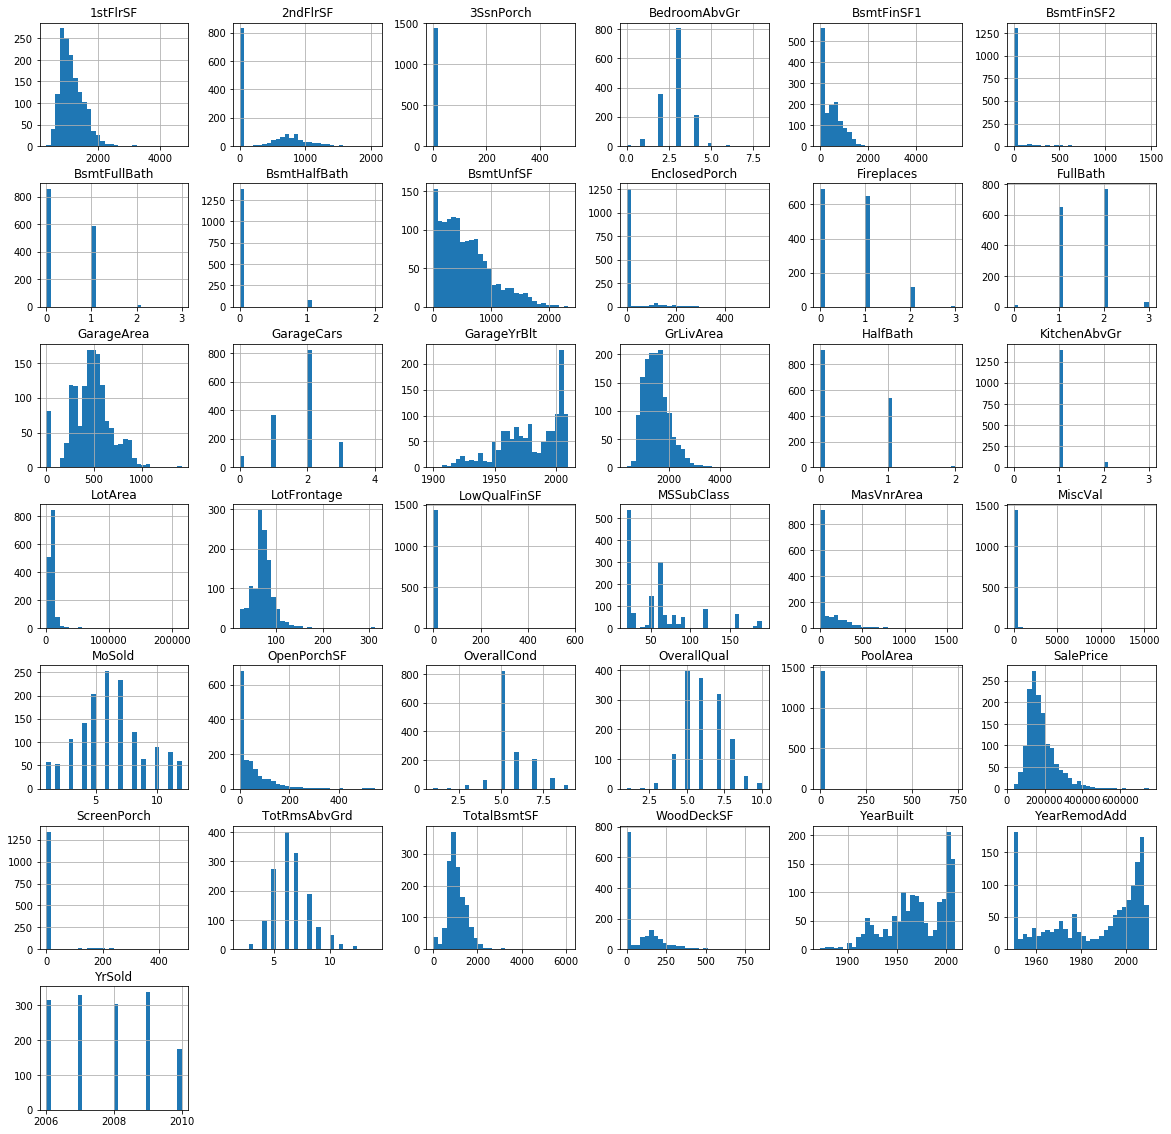

In [26]:
train.hist(bins = 30, figsize = (20,20))

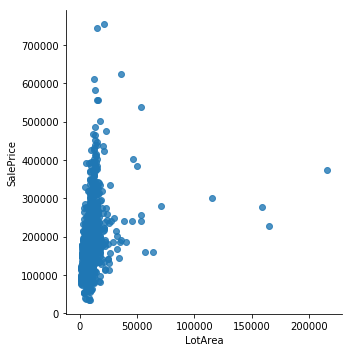

In [57]:
sns.lmplot(data=train, x="LotArea", y="SalePrice",  fit_reg=False)

### Missing values in train data

In [13]:
#train
na_list = list(train.columns[train.isnull().any()])
len(na_list)

19

In [14]:
#test
na_list = list(test.columns[test.isnull().any()])
len(na_list)

33

In [26]:
#train_test
len(train_test.columns[train_test.isnull().any()])

34

### Cleanning First 20 

In [33]:
train_test = train_test.iloc[:,0:20]

In [16]:
coln = list(train_test.columns)

In [19]:
#missing value counter
def na_counter(data):
    coln = list(data.columns)
    df_na ={}
    for col in coln:
        if data[col].isnull().any()==True:
            mvalue = data[col].isnull().sum()
            mpercent = data[col].isnull().sum()/len(data)
            df_na[col]=[mvalue, mpercent]
        else:df_na[col]=[0,0]
    df_Na =pd.DataFrame(df_na).T
    df_Na.columns = ['NA',"PERCENT"]
    return df_Na

In [20]:
na_counter(train_test)

,NA,PERCENT
MSSubClass,0.0,0.000000
MSZoning,4.0,0.001370
LotFrontage,486.0,0.166495
LotArea,0.0,0.000000
Street,0.0,0.000000
Alley,2721.0,0.932169
LotShape,0.0,0.000000
LandContour,0.0,0.000000
Utilities,2.0,0.000685
LotConfig,0.0,0.000000


In [21]:
# Alley is not important, removed

# Further analysis wit hMSZonning Lot Frontage and Utilities


### Feature Engineering
Quantitative, cateogrical data
Dummy variables.

### Nominal columns

In [ ]:
continuous_col = train_test.describe().columns
categorical_col =train_test.drop(continuous_col, axis=1).columns

In [34]:
def value_counts(data): 
    continuous_col = data.describe().columns
    categorical_col =data.drop(continuous_col, axis=1).columns
    for col in (categorical_col):
            print(data[col].value_counts())
            print(" ")

In [35]:
value_counts(train.iloc[:,0:20])

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
 
Pave    1454
Grvl       6
Name: Street, dtype: int64
 
Grvl    50
Pave    41
Name: Alley, dtype: int64
 
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
 
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
 
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
 
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
 
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
 
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neig

In [36]:
value_counts(train_test)

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
 
Pave    2907
Grvl      12
Name: Street, dtype: int64
 
Grvl    120
Pave     78
Name: Alley, dtype: int64
 
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
 
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
 
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64
 
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
 
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
 
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name

In [53]:
train["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [54]:
test["MSZoning"].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [58]:
test["Neighborhood"].value_counts()

NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
NPkVill     14
BrDale      14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64

In [61]:
test[test["MSZoning"].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,...,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal,0
2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,0
2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,0
2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,0


In [62]:
test.loc[test["MSZoning"].isnull(),'Neighborhood']

Id
1916     IDOTRR
2217     IDOTRR
2251     IDOTRR
2905    Mitchel
Name: Neighborhood, dtype: object

In [64]:
test.loc[test['Neighborhood']=="IDOTRR", "MSZoning"].value_counts()

RM         40
C (all)    13
Name: MSZoning, dtype: int64

In [69]:
train_test.loc[train_test["MSZoning"].isnull(), "MSZoning"] = "RM"

In [75]:
sum(train_test["MSZoning"].isnull())

0

In [ ]:
# removed Utility, Street, condition 2

In [76]:
sum(test["LotFrontage"].isnull())

227

In [38]:
#train_test["LotFrontage_fillin"] = train_test["LotFrontage"] if we want to create new column

In [77]:
train_test.loc[train_test["LotFrontage"].isnull(), "LotFrontage"] = 0

In [78]:
len(train_test[train_test["LotFrontage"].isnull()])

0

In [79]:
#drop columns 
df = train_test.drop(['Street', 'Alley',"Utilities","Condition2"], axis=1)

In [80]:
len(df.columns[df.isnull().any()])

0

In [ ]:
df.to_csv("first20_csv")

In [87]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd
Id,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003
2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976
3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002
4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970
5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000
6,50,RL,85.0,14115,IR1,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,1.5Fin,5,5,1993,1995
7,20,RL,75.0,10084,Reg,Lvl,Inside,Gtl,Somerst,Norm,1Fam,1Story,8,5,2004,2005
8,60,RL,0.0,10382,IR1,Lvl,Corner,Gtl,NWAmes,PosN,1Fam,2Story,7,6,1973,1973
9,50,RM,51.0,6120,Reg,Lvl,Inside,Gtl,OldTown,Artery,1Fam,1.5Fin,7,5,1931,1950


### Dummy variables

In [90]:
dummies = df[['MSSubClass', 'MSZoning','LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond']]

In [94]:
dummies = df.copy()

In [96]:
for feature in list(dummies.columns):
    new_dummy = pd.get_dummies(dummies[feature], prefix=feature)
    dummies = pd.concat([dummies.drop(feature, axis=1), new_dummy], axis=1)   
# for feature in list(dummies.columns):
#     new_dummy = pd.get_dummies(dummies[feature], prefix=feature , drop_first =True)
#     dummies = pd.concat([dummies.drop(feature, axis=1), new_dummy], axis=1)  

In [97]:
dummies.drop(['MSSubClass_20', 'MSZoning_C (all)','LotShape_IR2',
       'LandContour_Low', 'LotConfig_FR3', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Condition1_RRNe',
       'BldgType_2fmCon', 'HouseStyle_2.5Fin', 'OverallQual_1', 'OverallCond_1'], axis=1)

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,YearRemodAdd_2001,YearRemodAdd_2002,YearRemodAdd_2003,YearRemodAdd_2004,YearRemodAdd_2005,YearRemodAdd_2006,YearRemodAdd_2007,YearRemodAdd_2008,YearRemodAdd_2009,YearRemodAdd_2010
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
df_dummy = pd.concat([dummies, df[["LotArea","LotFrontage","YearBuilt","YearRemodAdd"]]], axis=1)

In [100]:
df_dummy.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,YearRemodAdd_2005,YearRemodAdd_2006,YearRemodAdd_2007,YearRemodAdd_2008,YearRemodAdd_2009,YearRemodAdd_2010,LotArea,LotFrontage,YearBuilt,YearRemodAdd
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,8450,65.0,2003,2003
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9600,80.0,1976,1976
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,11250,68.0,2001,2002
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,9550,60.0,1915,1970
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,14260,84.0,2000,2000


In [101]:
df_dummy.to_csv("first20_dummy.csv")

In [24]:
from sklearn import linear_model
ols = linear_model.LinearRegression()

In [25]:
X = train20[['LotShape', 'MSZoning', 'MSSubClass',"Neighborhood","Condition1","OverallQual","HouseStyle"]]  # input varialbe
Y = train20['SalePrice']  # output variable
ols.fit(X, Y)

ValueError: could not convert string to float: 'Reg'

### Chi sq test

In [66]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [67]:
df = train
df['dummyCat'] = np.random.choice([0, 1], size=(len(df),), p=[0.5, 0.5])

#Initialize ChiSquare Class
cT = ChiSquare(df)

In [7]:
testColumns = train.columns

In [68]:
#Feature Selection
testColumns = ['MSSubClass',  'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']

# testColumns = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
#        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
#        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
#        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd' ]
for var in testColumns:
    cT.TestIndependence(colX=var,colY="MSZoning" )  

MSSubClass is IMPORTANT for Prediction
LotFrontage is IMPORTANT for Prediction
LotArea is NOT an important predictor. (Discard LotArea from model)
Street is IMPORTANT for Prediction
Alley is IMPORTANT for Prediction
LotShape is IMPORTANT for Prediction
LandContour is IMPORTANT for Prediction
Utilities is NOT an important predictor. (Discard Utilities from model)
LotConfig is IMPORTANT for Prediction
LandSlope is IMPORTANT for Prediction
Neighborhood is IMPORTANT for Prediction
Condition1 is IMPORTANT for Prediction
Condition2 is IMPORTANT for Prediction
BldgType is IMPORTANT for Prediction
HouseStyle is IMPORTANT for Prediction
OverallQual is IMPORTANT for Prediction
OverallCond is IMPORTANT for Prediction
YearBuilt is IMPORTANT for Prediction
YearRemodAdd is IMPORTANT for Prediction
RoofStyle is IMPORTANT for Prediction
RoofMatl is NOT an important predictor. (Discard RoofMatl from model)
Exterior1st is IMPORTANT for Prediction
Exterior2nd is IMPORTANT for Prediction
MasVnrType is IMP

In [ ]:
testColumns = ['MSSubClass',  'Street',
       'Alley', 'LandContour', 'Utilities', 'Condition2', 
       'HouseStyle','YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2',
       'Electrical',  
       'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr','Functional',  'GarageType',
       'GarageYrBlt',  'GarageQual',
       'GarageCond', 'PavedDrive',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold']

In [ ]:
## based on X test, selected what it said important


train_test_01 = train_test.drop(['MSSubClass',  'Street',
       'Alley', 'LandContour', 'Utilities', 'Condition2', 
       'HouseStyle','YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2',
       'Electrical',  
       'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr','Functional',  'GarageType',
       'GarageYrBlt',  'GarageQual',
       'GarageCond', 'PavedDrive',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold'], axis=1)

### Multicollinearity

In [72]:
from sklearn.linear_model import LinearRegression 
continuous_features = ['LotArea', 'YearBuilt', 'YearRemodAdd']
scores = {}
ols2 = LinearRegression()
from sklearn.metrics import r2_score
for feature_name in continuous_features:
    df2     = train20.copy()
    feature = df2[feature_name].copy()
    df2.drop(feature_name, axis=1, inplace=True)
    ols2.fit(df2, feature)
    scores[feature_name] = ols2.score(df2, feature)

KeyError: ('LotArea', 'YearBuilt', 'YearRemodAdd')

#### Prediction

In [ ]:
predictions = model.predict(X_test)

#### Submission

In [ ]:
submission = pd.read_csv("data/sample_submission.csv", index_col="Id")
print(submission.shape)
submission.head()

In [ ]:
submission["SalePrice"] = predictions
print(submission.shape)

submission.head()

In [ ]:
submission.to_csv("data/submission.csv")